In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
training_set = pd.read_csv('data/SP500/tickers/MMM.csv')
training_set = training_set.iloc[:,5:6].values



In [2]:
training_set.shape

(1239, 1)

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [4]:
# Getting the inputs and the ouputs
X_train = training_set[0:1238]
y_train = training_set[1:1239]

# Reshaping
X_train = np.reshape(X_train, (1238, 1, 1))

In [5]:
print(X_train.shape)

(1238, 1, 1)


In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Using TensorFlow backend.


Epoch 1/200
1238/1238 [==============================] - 0s - loss: 0.1075     
Epoch 2/200
1238/1238 [==============================] - 0s - loss: 0.0751     
Epoch 3/200
1238/1238 [==============================] - 0s - loss: 0.0589     
Epoch 4/200
1238/1238 [==============================] - 0s - loss: 0.0521     
Epoch 5/200
1238/1238 [==============================] - 0s - loss: 0.0498     
Epoch 6/200
1238/1238 [==============================] - 0s - loss: 0.0488     
Epoch 7/200
1238/1238 [==============================] - 0s - loss: 0.0481     
Epoch 8/200
1238/1238 [==============================] - 0s - loss: 0.0474     
Epoch 9/200
1238/1238 [==============================] - 0s - loss: 0.0468     
Epoch 10/200
1238/1238 [==============================] - 0s - loss: 0.0461     
Epoch 11/200
1238/1238 [==============================] - 0s - loss: 0.0453     
Epoch 12/200
1238/1238 [==============================] - 0s - loss: 0.0445     
Epoch 13/200
1238/1238 [=============

1238/1238 [==============================] - 0s - loss: 1.4450e-04     
Epoch 100/200
1238/1238 [==============================] - 0s - loss: 1.4418e-04     
Epoch 101/200
1238/1238 [==============================] - 0s - loss: 1.4358e-04     
Epoch 102/200
1238/1238 [==============================] - 0s - loss: 1.4419e-04     
Epoch 103/200
1238/1238 [==============================] - 0s - loss: 1.4334e-04     
Epoch 104/200
1238/1238 [==============================] - 0s - loss: 1.4374e-04     
Epoch 105/200
1238/1238 [==============================] - 0s - loss: 1.4333e-04     
Epoch 106/200
1238/1238 [==============================] - 0s - loss: 1.4347e-04     
Epoch 107/200
1238/1238 [==============================] - 0s - loss: 1.4457e-04     
Epoch 108/200
1238/1238 [==============================] - 0s - loss: 1.4443e-04     
Epoch 109/200
1238/1238 [==============================] - 0s - loss: 1.4362e-04     
Epoch 110/200
1238/1238 [==============================] - 0s - loss

1238/1238 [==============================] - 0s - loss: 1.4437e-04     
Epoch 195/200
1238/1238 [==============================] - 0s - loss: 1.4601e-04     
Epoch 196/200
1238/1238 [==============================] - 0s - loss: 1.4485e-04     
Epoch 197/200
1238/1238 [==============================] - 0s - loss: 1.4477e-04     
Epoch 198/200
1238/1238 [==============================] - 0s - loss: 1.4426e-04     
Epoch 199/200
1238/1238 [==============================] - 0s - loss: 1.4329e-04     
Epoch 200/200
1238/1238 [==============================] - 0s - loss: 1.4353e-04     


In [8]:
test_set = pd.read_csv('data/SP500/symbols/MMM_test.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,210.550003,210.750000,207.550003,208.600006,208.600006,2108500
1,2018-09-05,208.289993,211.910004,207.350006,211.830002,211.830002,1951500
2,2018-09-06,212.000000,213.369995,211.070007,212.740005,212.740005,2363500
3,2018-09-07,212.240005,212.970001,209.970001,212.570007,212.570007,2739200
4,2018-09-10,213.679993,216.369995,212.860001,212.929993,212.929993,2399700


In [9]:
test_set.shape

(19, 7)

In [10]:
# Part 3 - Making the predictions and visualising the results

real_stock_price = test_set.iloc[:,5:6].values

# Getting the predicted stock price of 2018
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (19, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [11]:
real_stock_price

array([[ 208.600006],
       [ 211.830002],
       [ 212.740005],
       [ 212.570007],
       [ 212.929993],
       [ 211.779999],
       [ 206.710007],
       [ 209.050003],
       [ 207.880005],
       [ 209.529999],
       [ 211.529999],
       [ 213.119995],
       [ 215.270004],
       [ 216.330002],
       [ 213.509995],
       [ 210.639999],
       [ 211.070007],
       [ 210.110001],
       [ 210.710007]])

In [12]:
predicted_stock_price

array([[ 208.66732788],
       [ 211.91545105],
       [ 212.83039856],
       [ 212.6594696 ],
       [ 213.02140808],
       [ 211.8651886 ],
       [ 206.76629639],
       [ 209.11990356],
       [ 207.94316101],
       [ 209.60264587],
       [ 211.61381531],
       [ 213.2124176 ],
       [ 215.37362671],
       [ 216.43894958],
       [ 213.60447693],
       [ 210.71888733],
       [ 211.15129089],
       [ 210.18591309],
       [ 210.78927612]], dtype=float32)

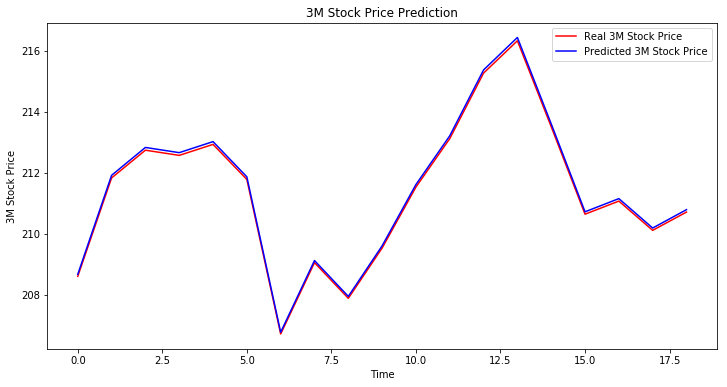

In [13]:
# Visualising the results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color = 'red', label = 'Real 3M Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted 3M Stock Price')
plt.title('3M Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('3M Stock Price')
plt.legend()
plt.show()

In [26]:
print(X_train.shape)

(1238, 1, 1)


In [27]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))))

Score
MAE:  0.0826
RMSE: 0.0836  


In [29]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price, predicted_stock_price)))

MSE:  0.0070


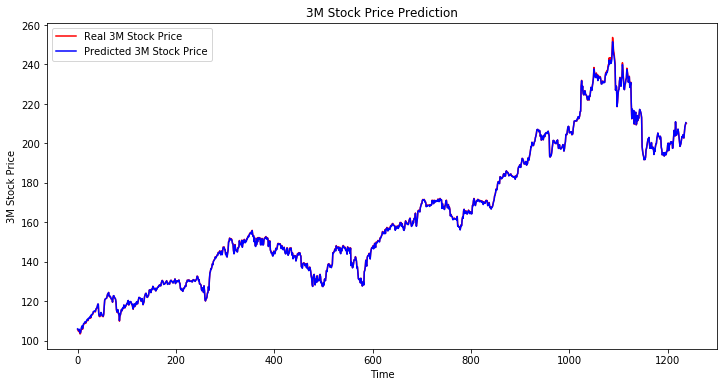

In [30]:
# Getting the real stock price of 2013 - 2018
real_stock_price_train = pd.read_csv('data/SP500/tickers/MMM.csv')
real_stock_price_train = real_stock_price_train.iloc[:,5:6].values


# Getting the predicted stock price of 2013 - 2018
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price_train, color = 'red', label = 'Real 3M Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted 3M Stock Price')
plt.title('3M Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('3M Stock Price')
plt.legend()
plt.show()

In [31]:
print(real_stock_price.shape)
print(predicted_stock_price.shape)

(19, 1)
(19, 1)


In [32]:
print(real_stock_price_train.shape)
print(predicted_stock_price_train.shape)

(1239, 1)
(1238, 1)


In [33]:
real_stock_price_train = real_stock_price_train[:1238]

In [34]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price_train, predicted_stock_price_train)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price_train, predicted_stock_price_train))))

Score
MAE:  0.1439
RMSE: 0.2159  


In [35]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price_train, predicted_stock_price_train)))

MSE:  0.0466
